# Trabajo Practico 5 Segmentación
Alumnos:  
ARRIETA Nahuel  
MOYANO Lucas

## 3. (*) Umbralización híbrida (combinación de Otsu + morfología). ¿Cómo mejorar la segmentación de objetos con ruido o regiones conectadas? Práctica sugerida: Aplicar Otsu, luego refinar con cv2.morphologyEx() (apertura o cierre).

In [48]:
import cv2
import sklearn
import skimage
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

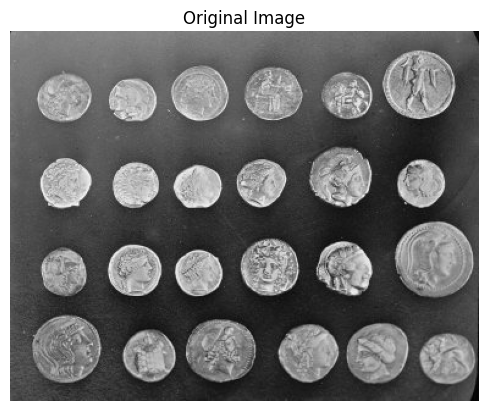

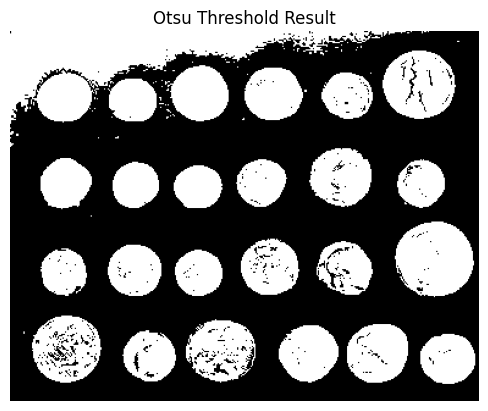

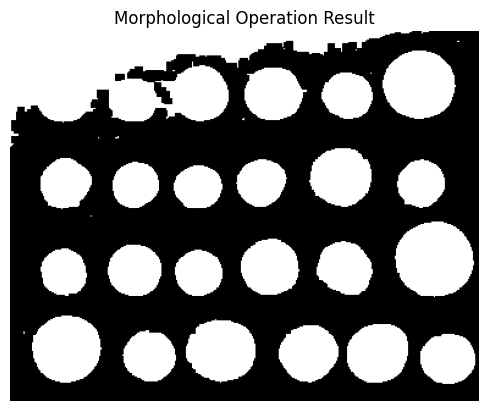

In [11]:
image = skimage.data.coins()
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

threshold = skimage.filters.threshold_otsu(image)
binary = image > threshold  # binary is a 2D boolean array

# Display
plt.imshow(binary, cmap='gray')  # 'gray' colormap for binary images
plt.title("Otsu Threshold Result")
plt.axis('off')
plt.show()

# Define kernel
kernel = np.ones((5, 5), np.uint8)

morphed = cv2.morphologyEx((binary * 255).astype(np.uint8), cv2.MORPH_CLOSE, kernel)
# Display the result of morphological operation
plt.imshow(morphed, cmap='gray')
plt.title("Morphological Operation Result")
plt.axis('off')
plt.show()

## 4. (*) Segmentación por detección de bordes. ¿Cómo se puede usar la información de bordes para segmentar una imagen? Práctica sugerida: Detectar bordes con cv2.Canny() o skimage.filters.sobel, luego aplicar umbral y cerrar regiones con morfología.

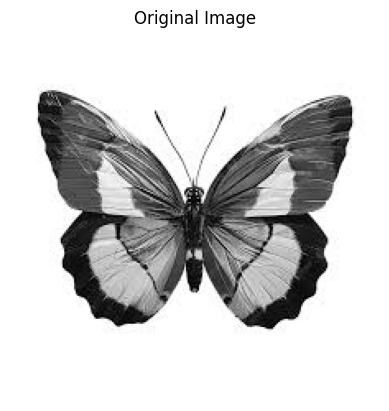

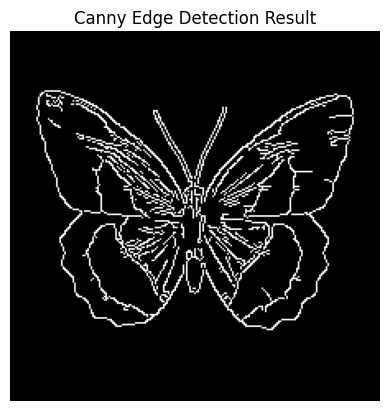

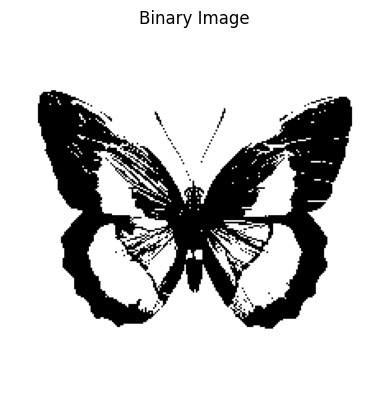

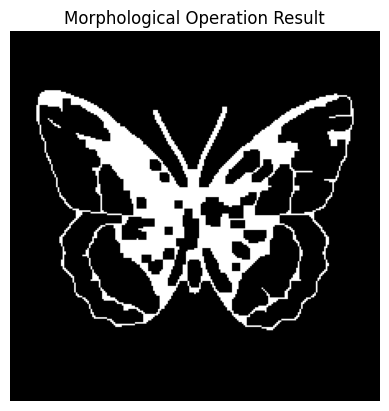

In [28]:
grey_butterfly = cv2.imread('img/mariposa.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(grey_butterfly, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

canny_butterfly = cv2.Canny(grey_butterfly, 200, 400)
# Display the Canny edge detection result
plt.imshow(canny_butterfly, cmap='gray')
plt.title("Canny Edge Detection Result")
plt.axis('off')
plt.show()

# Apply thresholding
_, binary_butterfly = cv2.threshold(grey_butterfly, 127, 255, cv2.THRESH_BINARY)
# Display the binary image
plt.imshow(binary_butterfly, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

# Apply morphological operations
kernel_butterfly = np.ones((5, 5), np.uint8)
morphed_butterfly = cv2.morphologyEx(canny_butterfly, cv2.MORPH_CLOSE, kernel_butterfly)
# Display the result of morphological operation
plt.imshow(morphed_butterfly, cmap='gray')
plt.title("Morphological Operation Result")
plt.axis('off')
plt.show()


## 8. (*) Segmentación basada en regiones (crecimiento o split-merge). ¿Cómo se puede segmentar una imagen expandiendo regiones homogéneas? Práctica sugerida: Usar skimage.segmentation.flood() o flood fill() para realizar crecimiento de regiones desde semillas.

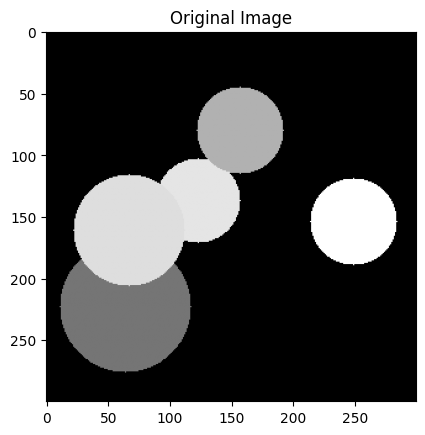

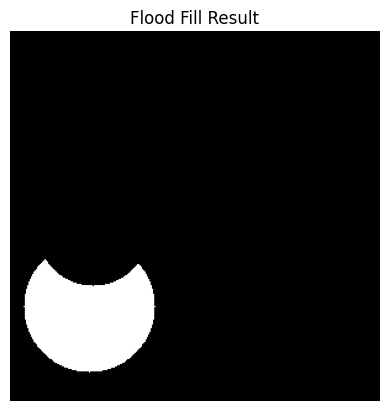

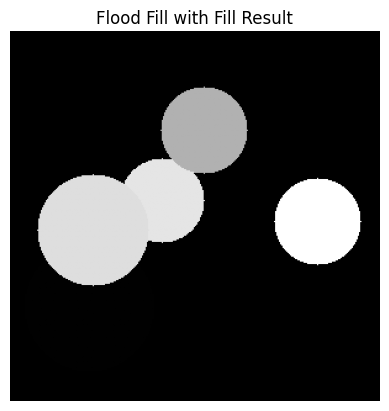

In [40]:
# we load img with skimage
image = skimage.io.imread('img/img_grises2.png', as_gray=True)
# Show it
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

seed = (250, 50)  # Initial seed point

flooded = skimage.segmentation.flood(image, seed, tolerance=0.5)
# Display the result of flood fill
plt.imshow(flooded, cmap='gray')
plt.title("Flood Fill Result")
plt.axis('off')
plt.show()

flooded_filled = skimage.segmentation.flood_fill(image, seed, 1, tolerance=0.5)
# Display the result of flood fill with fill
plt.imshow(flooded_filled, cmap='gray')
plt.title("Flood Fill with Fill Result")
plt.axis('off')
plt.show()


## 10. (*) Segmentación por combinación de técnicas (pipeline) Pregunta: ¿Qué beneficios tiene combinar varias técnicas de segmentación en un mismo flujo de procesamiento? Práctica sugerida: Aplicar primero Canny + morfología para generar una máscara, luego segmentar con Watershed o K-means sobre la región recortada.

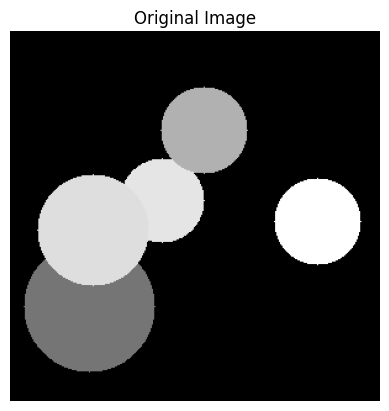

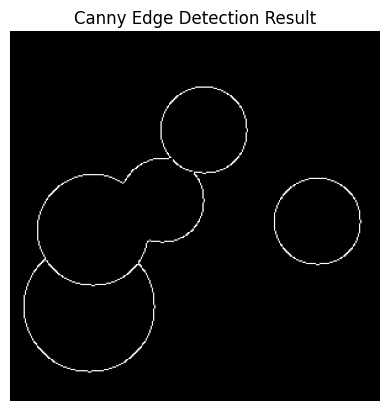

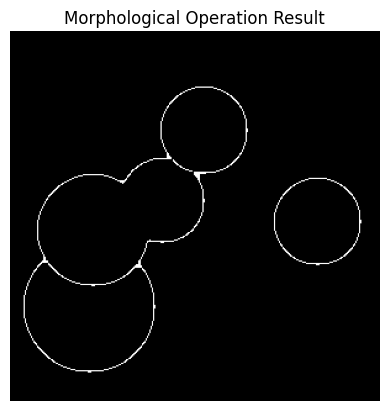

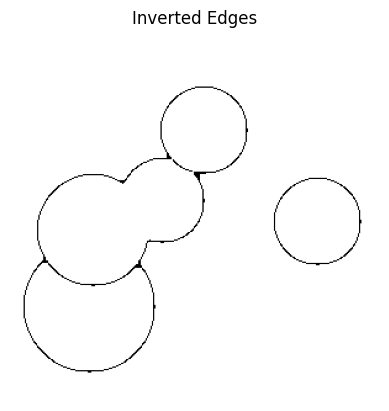

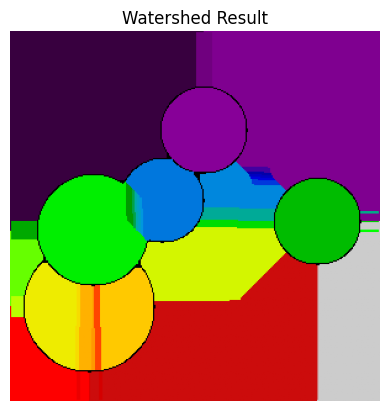

In [55]:
image = cv2.imread('img/img_grises2.png', cv2.IMREAD_GRAYSCALE)

# Show it
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# apply canny
canny = cv2.Canny(image, 50, 100)
# Display the Canny edge detection result
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection Result")
plt.axis('off')
plt.show()

# apply morphology
kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
# Display the result of morphological operation
plt.imshow(morphed, cmap='gray')
plt.title("Morphological Operation Result")
plt.axis('off')
plt.show()

edge_inv = np.logical_not(morphed)
# Display the inverted edges
plt.imshow(edge_inv, cmap='gray')
plt.title("Inverted Edges")
plt.axis('off')
plt.show()

# apply watershed
distance = ndi.distance_transform_edt(edge_inv)
# Get coordinates of local maxima
coordinates = skimage.feature.peak_local_max(distance, labels=edge_inv)
# Create a mask of local maxima
local_max = np.zeros_like(distance, dtype=bool)
local_max[tuple(coordinates.T)] = True
markers = ndi.label(local_max)[0]
labels = skimage.segmentation.watershed(-distance, markers, mask=edge_inv)
# Display the result of watershed
plt.imshow(labels, cmap='nipy_spectral')
plt.title("Watershed Result")
plt.axis('off')
plt.show()
